In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [3]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [5]:
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [8]:
diabetes_dataset.drop_duplicates(inplace=True)
diabetes_dataset.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
763,False
764,False
765,False
766,False


In [ ]:
diabetes_dataset['Glucose'] = diabetes_dataset['Glucose'].replace(0, diabetes_dataset['Glucose'].mean())
# Correcting missing values in blood pressure
diabetes_dataset['BloodPressure'] = diabetes_dataset['BloodPressure'].replace(0, diabetes_dataset['BloodPressure'].mean())
# Correcting missing values in BMI
diabetes_dataset['BMI'] = diabetes_dataset['BMI'].replace(0, diabetes_dataset['BMI'].median())
# Correct missing values in Insulin and SkinThickness

diabetes_dataset['SkinThickness'] = diabetes_dataset['SkinThickness'].replace(0, diabetes_dataset['SkinThickness'].median())
diabetes_dataset['Insulin'] = diabetes_dataset['Insulin'].replace(0, diabetes_dataset['Insulin'].median())

In [ ]:
# Review dataset statistics
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


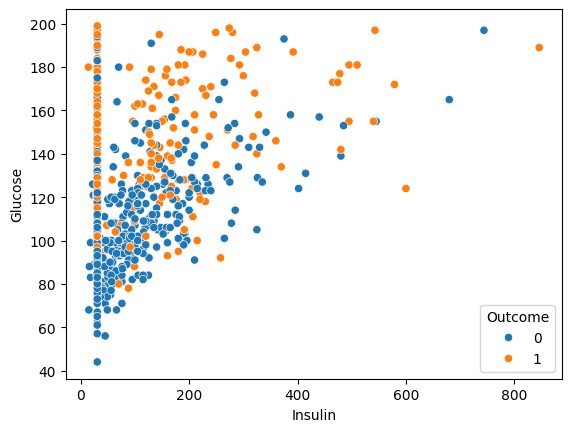

In [ ]:
sns.scatterplot(data=diabetes_dataset,x='Insulin',y='Glucose',hue='Outcome')
plt.show()

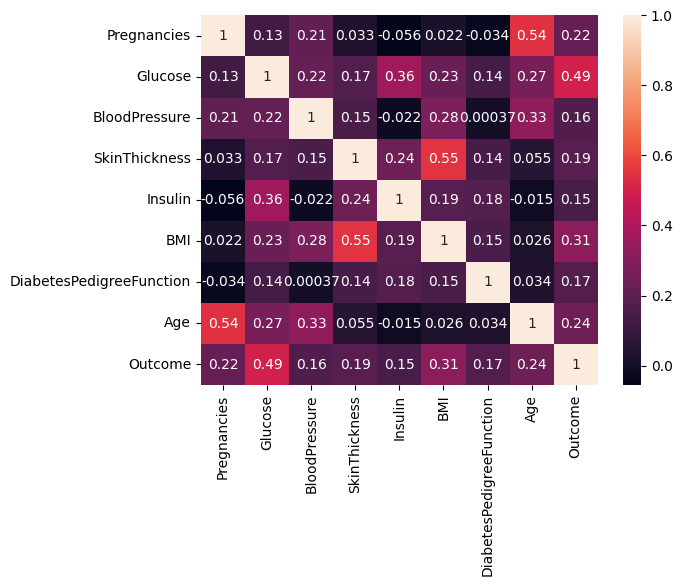

In [ ]:
sns.heatmap(data=diabetes_dataset.corr(),annot=True)
plt.show()

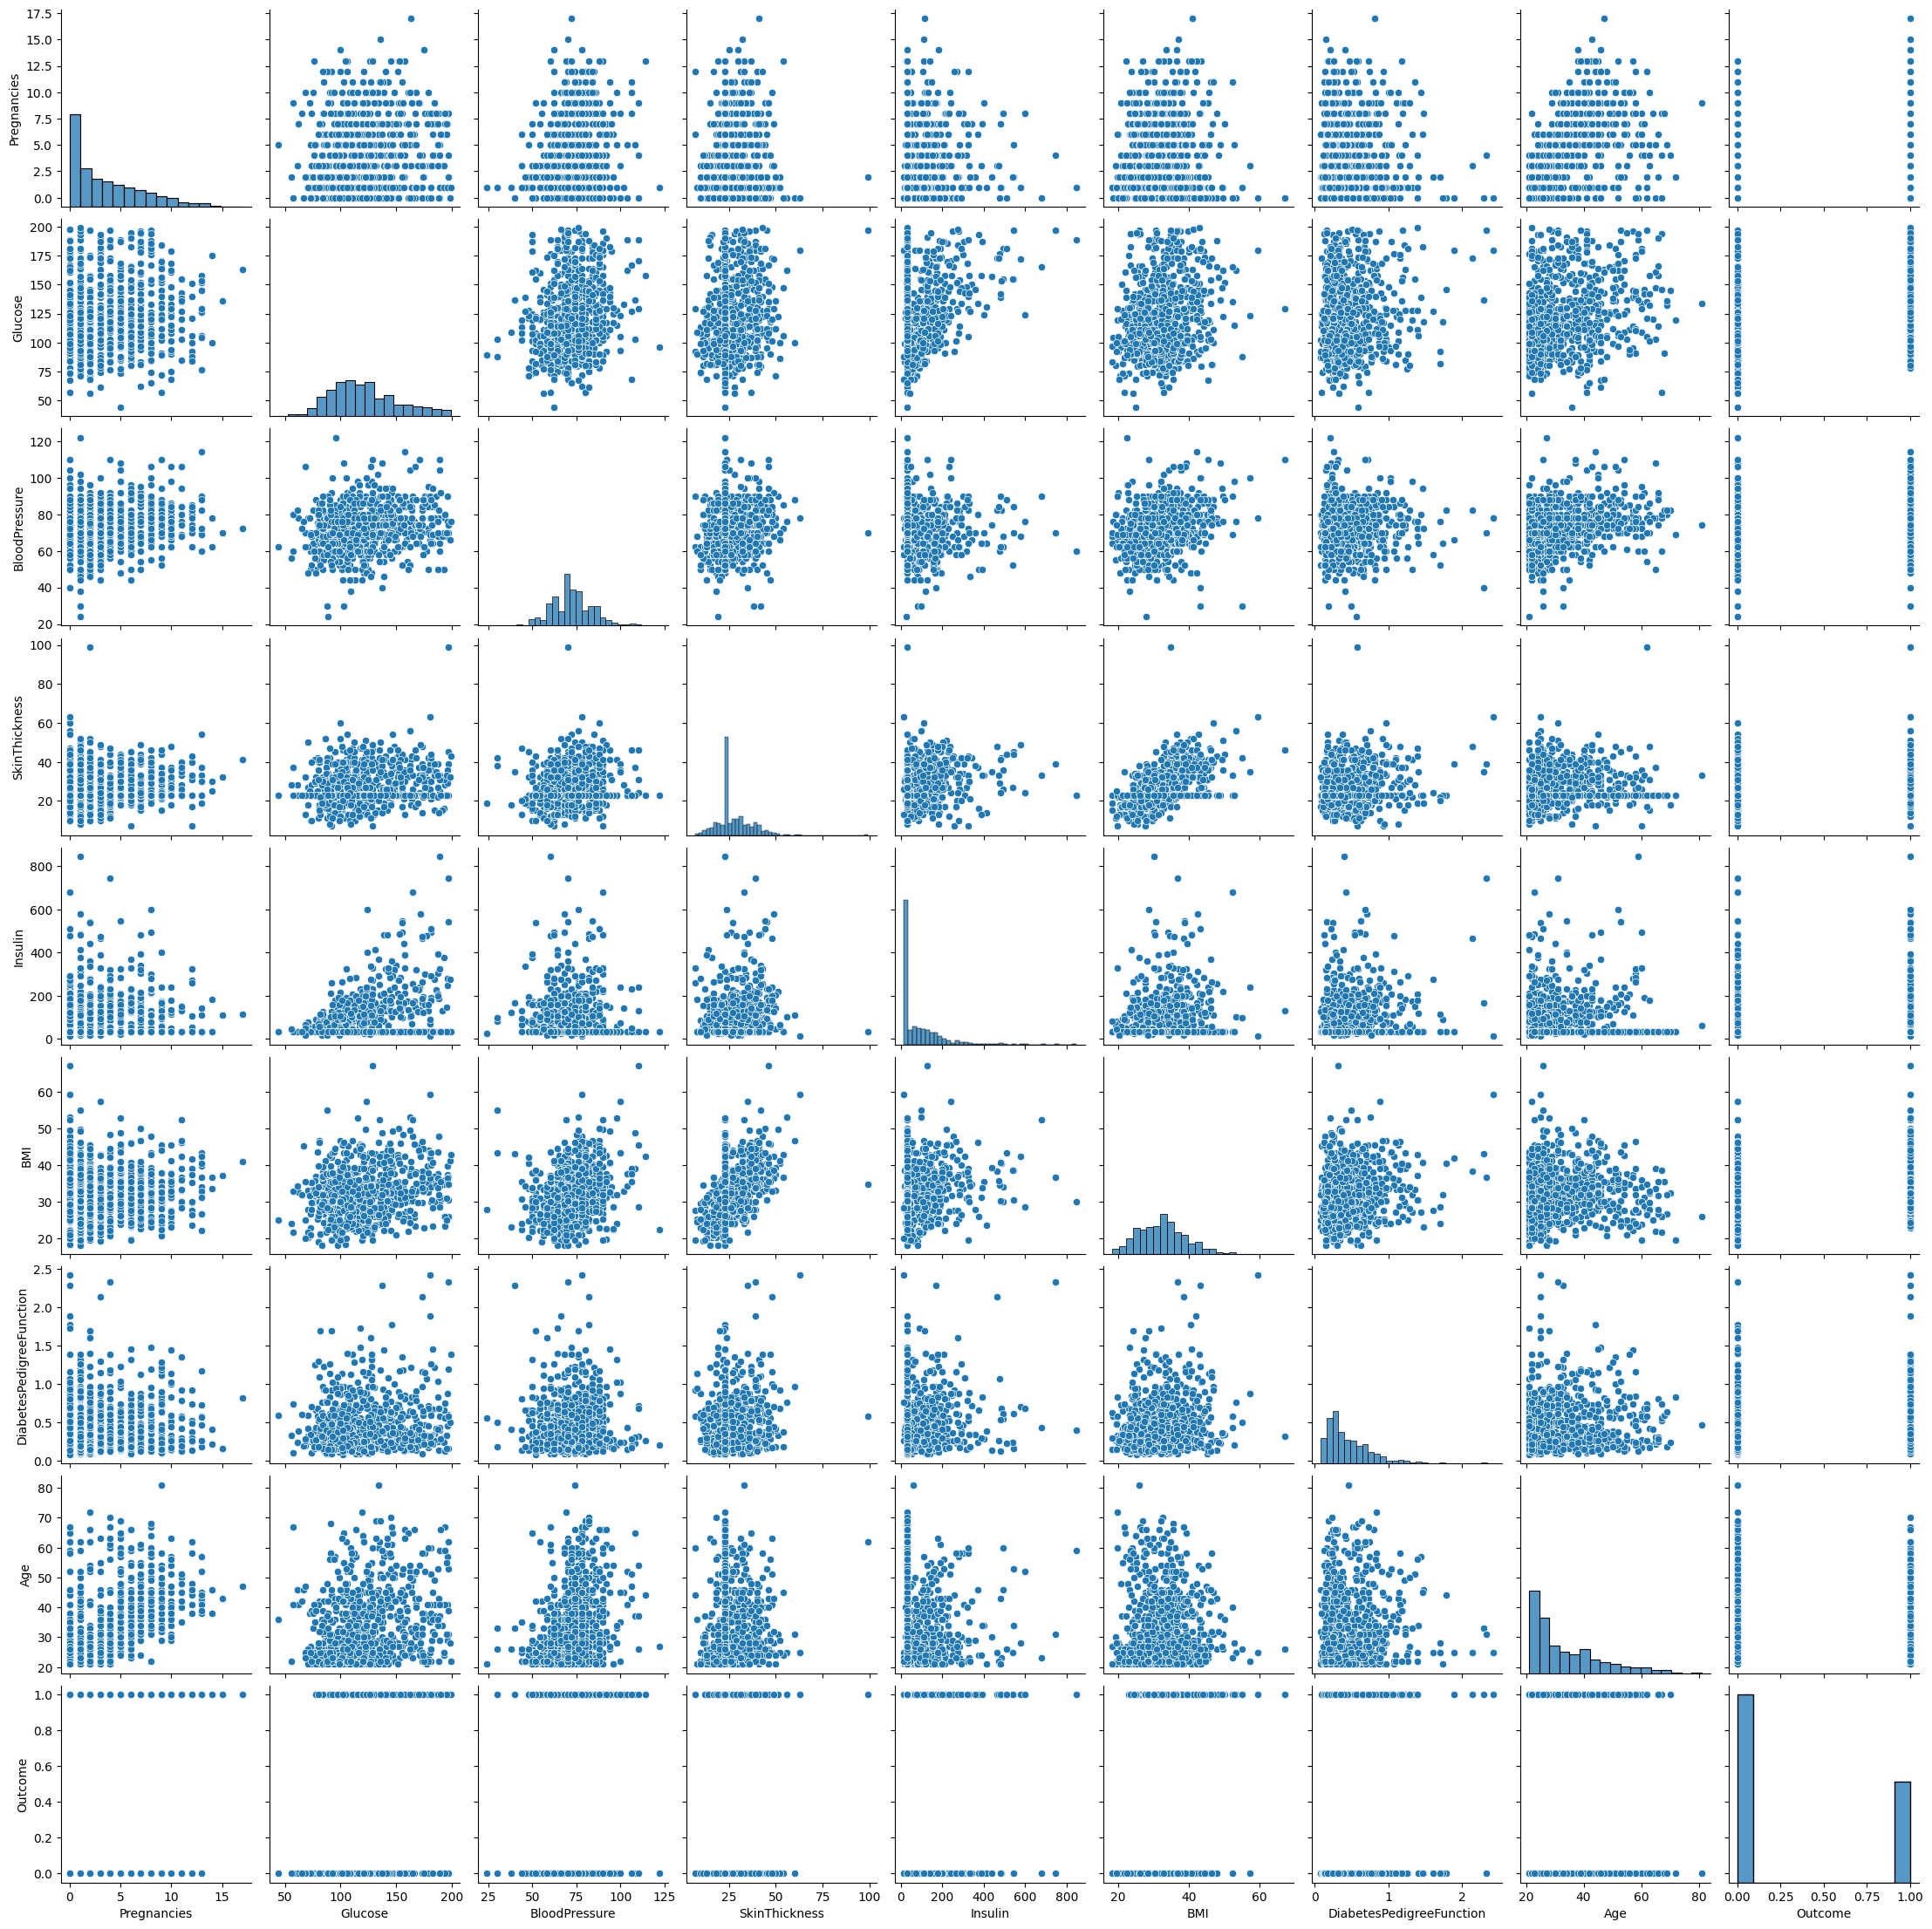

In [ ]:
sns.pairplot(diabetes_dataset)
plt.show()

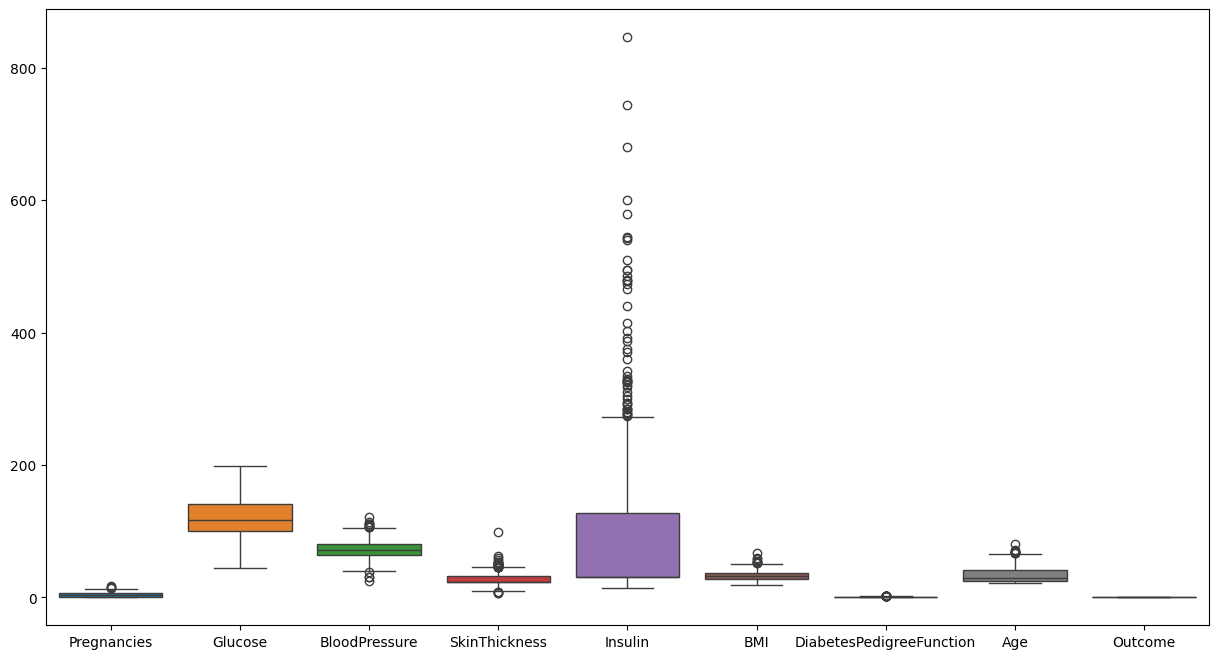

In [ ]:
plt.figure(figsize=(15,8))


sns.boxplot(data=diabetes_dataset)
plt.show()

In [ ]:
# Exploring Imbalance In Dataset

diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
# Extracting Features Into Features & Target
X = diabetes_dataset.drop(['Outcome'], axis=1)
Y = diabetes_dataset['Outcome']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (Y) Shape Before Balancing :', Y.shape)

Feature (X) Shape Before Balancing : (768, 8)
Target (Y) Shape Before Balancing : (768,)


In [ ]:
from imblearn.over_sampling import SMOTE


# Intialising SMOTE Object
sm = SMOTE(random_state=300)
# Resampling Data
X, Y = sm.fit_resample(X, Y)


print('Feature (X) Shape After Balancing :', X.shape)
print('Target (Y) Shape After Balancing :', Y.shape)

Feature (X) Shape After Balancing : (1000, 8)
Target (Y) Shape After Balancing : (1000,)


In [ ]:
X = diabetes_dataset.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35,30.5,33.6,0.627,50
1,1,85.0,66.0,29,30.5,26.6,0.351,31
2,8,183.0,64.0,23,30.5,23.3,0.672,32
3,1,89.0,66.0,23,94.0,28.1,0.167,21
4,0,137.0,40.0,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48,180.0,32.9,0.171,63
764,2,122.0,70.0,27,30.5,36.8,0.340,27
765,5,121.0,72.0,23,112.0,26.2,0.245,30
766,1,126.0,60.0,23,30.5,30.1,0.349,47


In [ ]:
Y=diabetes_dataset["Outcome"]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.831114,-0.608201,0.167240,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.180566,-0.608201,-0.851551,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.469981,-0.608201,-1.331838,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.469981,-0.006185,-0.633239,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.831114,0.695378,1.549885,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679954,0.309315,2.240633,0.809145,0.065361,-0.908682,2.532136
764,-0.547919,0.010468,-0.186224,-0.036283,-0.608201,0.632973,-0.398282,-0.531023
765,0.342981,-0.022409,-0.021044,-0.469981,0.164466,-0.909768,-0.685193,-0.275760
766,-0.844885,0.141977,-1.012121,-0.469981,-0.608201,-0.342155,-0.371101,1.170732


In [ ]:
Y=diabetes_dataset["Outcome"]
Y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.3, random_state=31)

In [ ]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
504,-0.250952,-0.844340,0.474494,1.264812,-0.608201,0.705744,-0.706334,0.575118
485,-1.141852,0.437872,-0.351403,1.590085,1.472785,1.433452,-0.322779,-0.786286
523,1.530847,0.273486,-0.186224,-0.469981,-0.608201,0.254565,0.543995,1.000557
259,2.124780,1.095416,0.309315,0.072142,0.524727,0.123578,2.661098,1.511083
493,0.046014,0.109100,-0.186224,-1.012104,0.259271,-0.516805,2.029893,1.000557
...,...,...,...,...,...,...,...,...
663,1.530847,0.766644,0.639674,2.023784,0.335116,0.793069,0.498693,0.575118
610,-0.250952,-0.515568,-1.507660,-0.686830,0.600572,-0.225722,-0.543248,-0.786286
16,-1.141852,-0.121041,0.970033,2.132208,1.283173,1.942847,0.238963,-0.190672
599,-0.844885,-0.416936,-2.829096,-1.012104,0.240310,-1.360946,-0.195934,-0.616111


In [ ]:
Y_train

,Outcome
504,0
485,1
523,1
259,1
493,1
...,...
663,1
610,0
16,1
599,0


In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr.score(X_train,Y_train)*100,lr.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[293  59]
 [ 67 119]]
Accuracy by confusion matrix: 0.7657992565055762


                  precision    recall  f1-score   support

without diabetes       0.81      0.83      0.82       352
   with diabetes       0.67      0.64      0.65       186

        accuracy                           0.77       538
       macro avg       0.74      0.74      0.74       538
    weighted avg       0.76      0.77      0.76       538

----------------------------------------------------------------------


(75.21739130434783, 76.57992565055763)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameter configuration space
logreg_params = {
      'penalty': ['l1','l2'],
      'C': [0.01, 0.1, 1, 10],
      'solver': ['liblinear'],
      'max_iter': [100, 200, 500],
                                     }
# Grid search with 3-fold cross-validation
lr_grid = GridSearchCV(lr, logreg_params, cv=3)
lr_grid.fit(X_train, Y_train)

# Best hyperparameters
print("Best Parameters:", lr_grid.best_params_)
print( lr_grid.best_estimator_)

Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')


In [ ]:
lr_grid.fit(X_train,Y_train)
Y_pred = lr_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
lr_grid.score(X_train,Y_train)*100,lr_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[295  57]
 [ 62 124]]
Accuracy by confusion matrix: 0.7788104089219331


                  precision    recall  f1-score   support

without diabetes       0.83      0.84      0.83       352
   with diabetes       0.69      0.67      0.68       186

        accuracy                           0.78       538
       macro avg       0.76      0.75      0.75       538
    weighted avg       0.78      0.78      0.78       538

----------------------------------------------------------------------


(76.08695652173914, 77.88104089219331)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
knn.score(X_train,Y_train)*100,knn.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[275  77]
 [ 73 113]]
Accuracy by confusion matrix: 0.7211895910780669


                  precision    recall  f1-score   support

without diabetes       0.79      0.78      0.79       352
   with diabetes       0.59      0.61      0.60       186

        accuracy                           0.72       538
       macro avg       0.69      0.69      0.69       538
    weighted avg       0.72      0.72      0.72       538

----------------------------------------------------------------------


(78.26086956521739, 72.11895910780669)

In [ ]:
#KNN
from sklearn.model_selection import GridSearchCV
knn_params = {
    'n_neighbors': [2,5,7,12,15],
        }
# Grid search with 3-fold cross-validation
knn_grid = GridSearchCV(knn, knn_params, cv=3)

# Fit the model on training data
knn_grid.fit(X_train, Y_train)

# Best hyperparameters
print("Best Parameters:", knn_grid.best_params_)
print( knn_grid.best_estimator_)

Best Parameters: {'n_neighbors': 15}
KNeighborsClassifier(n_neighbors=15)


In [ ]:
knn_grid.fit(X_train,Y_train)
Y_pred = knn_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
knn_grid.score(X_train,Y_train)*100,knn_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[307  45]
 [ 89  97]]
Accuracy by confusion matrix: 0.7509293680297398


                  precision    recall  f1-score   support

without diabetes       0.78      0.87      0.82       352
   with diabetes       0.68      0.52      0.59       186

        accuracy                           0.75       538
       macro avg       0.73      0.70      0.71       538
    weighted avg       0.74      0.75      0.74       538

----------------------------------------------------------------------


(77.39130434782608, 75.09293680297398)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred = dt.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt.score(X_train,Y_train)*100,dt.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[249 103]
 [ 77 109]]
Accuracy by confusion matrix: 0.6654275092936803


                  precision    recall  f1-score   support

without diabetes       0.76      0.71      0.73       352
   with diabetes       0.51      0.59      0.55       186

        accuracy                           0.67       538
       macro avg       0.64      0.65      0.64       538
    weighted avg       0.68      0.67      0.67       538

----------------------------------------------------------------------


(100.0, 66.54275092936803)

[Text(0.38125, 0.9705882352941176, 'x[1] <= -0.368\ngini = 0.459\nsamples = 230\nvalue = [148, 82]'),
 Text(0.2125, 0.9117647058823529, 'x[0] <= 2.125\ngini = 0.177\nsamples = 92\nvalue = [83, 9]'),
 Text(0.296875, 0.9411764705882353, 'True  '),
 Text(0.15, 0.8529411764705882, 'x[3] <= 1.482\ngini = 0.127\nsamples = 88\nvalue = [82, 6]'),
 Text(0.1, 0.7941176470588235, 'x[5] <= 0.109\ngini = 0.09\nsamples = 85\nvalue = [81, 4]'),
 Text(0.075, 0.7352941176470589, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(0.125, 0.7352941176470589, 'x[2] <= 0.64\ngini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.075, 0.6764705882352942, 'x[5] <= 0.487\ngini = 0.188\nsamples = 19\nvalue = [17, 2]'),
 Text(0.05, 0.6176470588235294, 'x[6] <= -0.347\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(0.025, 0.5588235294117647, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.075, 0.5588235294117647, 'x[4] <= -0.12\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.05, 0.5, 'gini = 0.0\ns

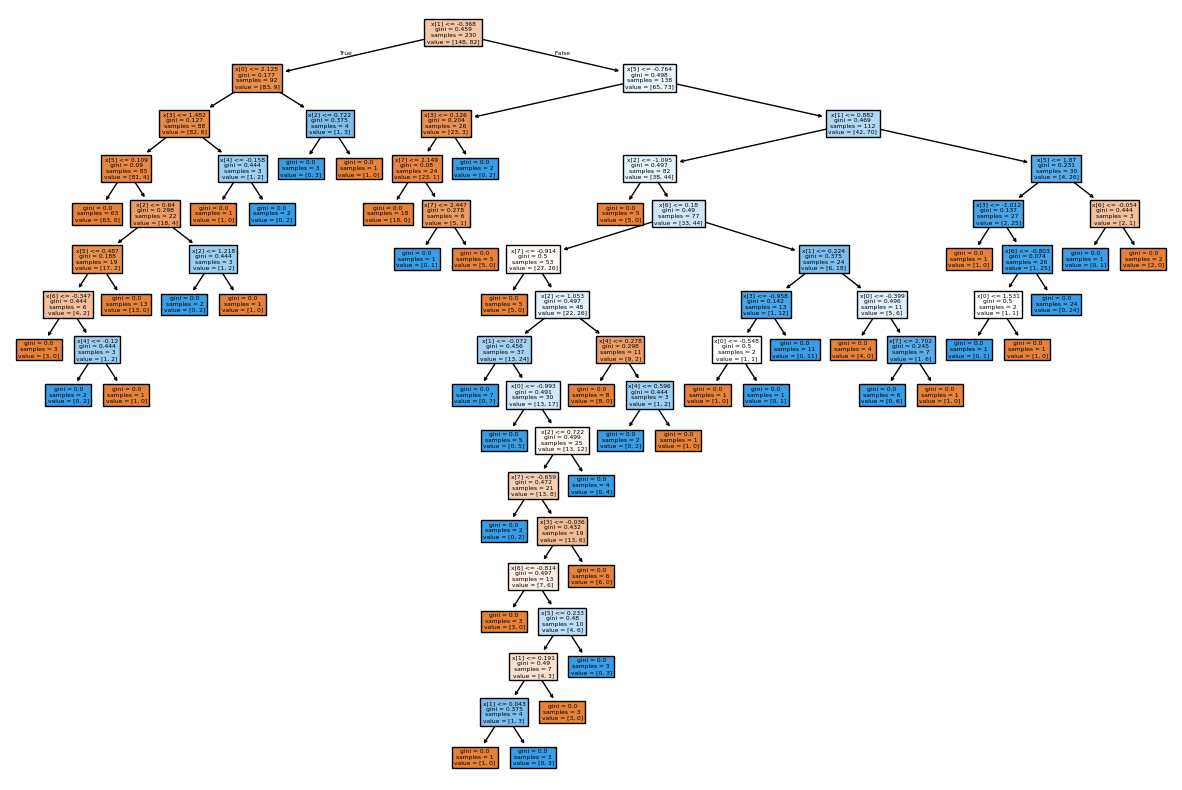

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [ ]:
dt_params = {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [3, 5, 10, 15],
        'max_features': ['sqrt', 'log2']
                                            }




dt_grid= GridSearchCV(dt,param_grid = dt_params,cv = 3)
dt_grid.fit(X_train,Y_train)
# Best hyperparameters
print("Best Parameters:", dt_grid.best_params_)
print( dt_grid.best_estimator_)


Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'random'}
DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       splitter='random')


In [ ]:
dt_grid.fit(X_train,Y_train)
Y_pred = dt_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
dt_grid.score(X_train,Y_train)*100,dt_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[275  77]
 [102  84]]
Accuracy by confusion matrix: 0.6672862453531598


                  precision    recall  f1-score   support

without diabetes       0.73      0.78      0.75       352
   with diabetes       0.52      0.45      0.48       186

        accuracy                           0.67       538
       macro avg       0.63      0.62      0.62       538
    weighted avg       0.66      0.67      0.66       538

----------------------------------------------------------------------


(95.21739130434783, 66.72862453531599)

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(X_train, Y_train)
Y_pred = svm.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
svm.score(X_train,Y_train)*100,svm.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[295  57]
 [ 65 121]]
Accuracy by confusion matrix: 0.7732342007434945


                  precision    recall  f1-score   support

without diabetes       0.82      0.84      0.83       352
   with diabetes       0.68      0.65      0.66       186

        accuracy                           0.77       538
       macro avg       0.75      0.74      0.75       538
    weighted avg       0.77      0.77      0.77       538

----------------------------------------------------------------------


(77.39130434782608, 77.32342007434944)

In [ ]:
#SVM
from sklearn.model_selection import GridSearchCV
svm_params = {
    'C': [1,10, 100],
    "kernel":['linear','sigmoid'],

                 }
# Grid search with 3-fold cross-validation
svm_grid = GridSearchCV(svm, svm_params, cv=3)

# Fit the model on training data
svm_grid.fit(X_train, Y_train)

# Best hyperparameters
print("Best Parameters:", svm_grid.best_params_)
print( svm_grid.best_estimator_)

Best Parameters: {'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


In [ ]:
svm_grid.fit(X_train,Y_train)
Y_pred = svm_grid.predict(X_test)
confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print("-"*70)
print("Report")
print("-"*70)
print("Confusion Matrix:")
print(str(confusion_matrix))
target_names = ['without diabetes', 'with diabetes']
acc=(confusion_matrix[0][0] + confusion_matrix[1][1])/(confusion_matrix[0][0]+confusion_matrix[0][1]+confusion_matrix[1][0]+confusion_matrix[1][1])
print("Accuracy by confusion matrix: "+str(acc))
print("\n")
print(classification_report(Y_test, Y_pred, target_names=target_names))
print("-"*70)
svm_grid.score(X_train,Y_train)*100,svm_grid.score(X_test,Y_test)*100

----------------------------------------------------------------------
Report
----------------------------------------------------------------------
Confusion Matrix:
[[295  57]
 [ 65 121]]
Accuracy by confusion matrix: 0.7732342007434945


                  precision    recall  f1-score   support

without diabetes       0.82      0.84      0.83       352
   with diabetes       0.68      0.65      0.66       186

        accuracy                           0.77       538
       macro avg       0.75      0.74      0.75       538
    weighted avg       0.77      0.77      0.77       538

----------------------------------------------------------------------


(77.39130434782608, 77.32342007434944)

In [ ]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
55,-0.844885,-1.600516,-1.838019,-1.879500,-0.608201,-1.375501,-0.676133,-1.041549
87,-0.547919,-0.712831,-0.351403,-0.253132,-0.224238,0.880394,-0.446604,-0.616111
752,-0.250952,-0.449813,-0.846942,-0.361556,-0.608201,-0.938876,-0.751636,-0.701198
202,-1.141852,-0.449813,-0.351403,-0.795255,-0.608201,-0.749672,0.951711,-0.105584
378,0.046014,1.128294,0.226725,-0.469981,-0.608201,2.306701,-0.706334,-0.105584
...,...,...,...,...,...,...,...,...
49,0.936914,-0.548445,-0.260103,-0.469981,-0.608201,-0.065626,-0.503986,-0.786286
358,2.421746,-1.107358,0.144135,1.373236,-0.385407,0.414661,-0.283518,1.255820
389,-0.250952,-0.712831,-0.351403,-0.469981,-0.129432,-0.123843,1.440970,-0.445935
58,-1.141852,0.799521,0.804853,-0.469981,-0.608201,1.171477,3.953709,0.915469


In [ ]:
svm_grid.predict([[0.366929,-1.410899,-2.127065,-1.341558,-0.829247,0.263529,0.896565,-0.696820]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
Y_test

,Outcome
55,0
87,0
752,0
202,0
378,1
...,...
49,0
358,0
389,0
58,0


In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = svm_grid.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.45706576 -0.0210444  -0.90367905  0.76174179 -0.96798414
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
import pickle
# Save the trained SVM model with pickle
pickle.dump(svm_grid, open('diabetes.pkl', 'wb'))
